In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
from scipy import stats

In [96]:
df1 = pd.read_csv("data\isb_data.csv",index_col=0)
df1.head()

,price,location,baths,bedrooms,Total_Area
2,165.0,G-15,6,5,2178.008
3,435.0,Bani Gala,4,4,10890.000
4,70.0,DHA Defence,3,3,2178.008
5,345.0,Ghauri Town,8,8,87120.000
6,270.0,Korang Town,8,8,5445.000


In [97]:
df2 = df1.copy()
df2['price_per_sqft'] = df2['price']/df2['Total_Area']
df2

,price,location,baths,bedrooms,Total_Area,price_per_sqft
2,165.0,G-15,6,5,2178.008,0.075757
3,435.0,Bani Gala,4,4,10890.000,0.039945
4,70.0,DHA Defence,3,3,2178.008,0.032139
5,345.0,Ghauri Town,8,8,87120.000,0.003960
6,270.0,Korang Town,8,8,5445.000,0.049587
...,...,...,...,...,...,...
168306,127.0,Soan Garden,3,3,2722.510,0.046648
168307,270.0,G-13,4,4,1905.757,0.141676
168308,90.0,Soan Garden,3,2,1633.506,0.055096
168309,140.0,F-7,7,7,5445.000,0.025712


In [98]:
len(df2.location.unique())

175

In [99]:
df2.location = df2.location.apply(lambda x: x.strip())

In [100]:
df2.isnull().sum()

price             0
location          0
baths             0
bedrooms          0
Total_Area        0
price_per_sqft    0
dtype: int64

In [101]:
df2.Total_Area.describe()

count    1.187000e+04
mean     4.214460e+04
std      3.109849e+06
min      0.000000e+00
25%      1.633506e+03
50%      2.722510e+03
75%      1.089000e+04
max      3.387988e+08
Name: Total_Area, dtype: float64

In [102]:
def removeOutliersPricePerArea(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df3 = removeOutliersPricePerArea(df2)


df3.price_per_sqft.describe()

count    7389.000000
mean        0.070191
std         0.045742
min         0.000020
25%         0.034107
50%         0.062442
75%         0.091827
max         0.459135
Name: price_per_sqft, dtype: float64

In [103]:
df4 = df3[df3.baths<df3.bedrooms+2]
df4

,price,location,baths,bedrooms,Total_Area,price_per_sqft
1,1150.0,7th Avenue,0,0,70785.000,0.016246
2,425.0,9th Avenue,5,5,3267.012,0.130088
3,220.0,9th Avenue,3,3,1905.757,0.115440
4,250.0,AGHOSH,10,10,5445.000,0.045914
6,125.0,Abdullah Garden,4,3,1361.255,0.091827
...,...,...,...,...,...,...
7384,260.0,Zaraj Housing Scheme,7,6,3811.514,0.068214
7385,180.0,Zaraj Housing Scheme,6,6,3811.514,0.047225
7386,125.0,Zaraj Housing Scheme,0,0,2722.510,0.045914
7387,240.0,Zaraj Housing Scheme,7,6,3267.012,0.073462


In [104]:
df5 = df4[df4.baths != 0]

In [105]:
df6 = df5[df5.bedrooms != 0]

Text(0, 0.5, 'Count')

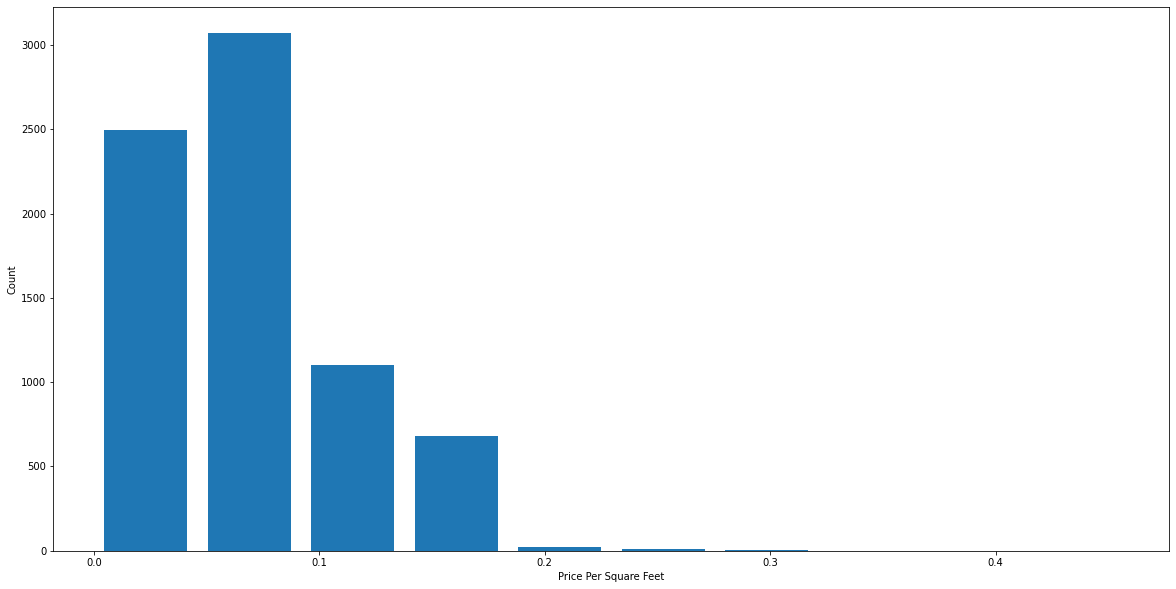

In [106]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [107]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [108]:
location_stats_less_than_10 = location_stats[location_stats<=5]
df6.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

75

In [109]:
location_dummies = pd.get_dummies(df6.location)
location_dummies

,Abdullah Garden,Ali Pur,Alipur Farash,Arsalan Town,B-17,Bani Gala,Bhara kahu,Burma Town,CBR Town,Chatha Bakhtawar,...,Shaheen Town,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,Zaraj Housing Scheme,other
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [110]:
df7 = pd.concat([df6, location_dummies.drop('other', axis = 'columns')], axis="columns")
df7.head()

,price,location,baths,bedrooms,Total_Area,price_per_sqft,Abdullah Garden,Ali Pur,Alipur Farash,Arsalan Town,...,Shah Allah Ditta,Shaheen Town,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,Zaraj Housing Scheme
2,425.0,other,5,5,3267.012,0.130088,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,220.0,other,3,3,1905.757,0.115440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,250.0,other,10,10,5445.000,0.045914,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,125.0,Abdullah Garden,4,3,1361.255,0.091827,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,145.0,Abdullah Garden,4,4,1905.757,0.076085,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X = df7.drop(['price', 'location', 'price_per_sqft'], axis="columns")
X.head()

,baths,bedrooms,Total_Area,Abdullah Garden,Ali Pur,Alipur Farash,Arsalan Town,B-17,Bani Gala,Bhara kahu,...,Shah Allah Ditta,Shaheen Town,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,Zaraj Housing Scheme
2,5,5,3267.012,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1905.757,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,10,5445.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,3,1361.255,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,4,1905.757,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y = df7.price
y.head()

2    425.0
3    220.0
4    250.0
6    125.0
7    145.0
Name: price, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [148]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8244073597686135

In [149]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.62518716, 0.78817767, 0.80674007, 0.79604157, 0.80264032])

In [150]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = []


In [117]:
model = {
    'model': LinearRegression(),
    'params': {'normalize': [True, False]}
}

gs =  GridSearchCV(model['model'], model['params'], cv=cv, return_train_score=False)
gs.fit(X_train, y_train)
scores.append({
            'model': 'Linear Regression',
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

In [118]:
scores

[{'model': 'Linear Regression',
  'best_score': 0.7593824918387078,
  'best_params': {'normalize': False}}]

In [119]:
model = {
    'model': Lasso(),
    'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
}

gs =  GridSearchCV(model['model'], model['params'], cv=cv, return_train_score=False)
gs.fit(X_train, y_train)
scores.append({
            'model': 'Lasso',
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

In [120]:
model = {
    'model': DecisionTreeRegressor(),
    'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
}

gs =  GridSearchCV(model['model'], model['params'], cv=cv, return_train_score=False)
gs.fit(X_train, y_train)
scores.append({
            'model': 'Decision Tree Regressor',
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='square

In [121]:
scores

[{'model': 'Linear Regression',
  'best_score': 0.7593824918387078,
  'best_params': {'normalize': False}},
 {'model': 'Lasso',
  'best_score': 0.7375011837454648,
  'best_params': {'alpha': 1, 'selection': 'random'}},
 {'model': 'Decision Tree Regressor',
  'best_score': 0.8547458275882593,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

In [123]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')

dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.8614629114136023

In [153]:
X.columns

Index(['baths', 'bedrooms', 'Total_Area', 'Abdullah Garden', 'Ali Pur',
       'Alipur Farash', 'Arsalan Town', 'B-17', 'Bani Gala', 'Bhara kahu',
       'Burma Town', 'CBR Town', 'Chatha Bakhtawar', 'D-12', 'D-17',
       'DHA Defence', 'E-11', 'E-7', 'Emaar Canyon Views', 'F-10', 'F-11',
       'F-15', 'F-17', 'F-6', 'F-7', 'F-8', 'FECHS', 'Faisal Town - F-18',
       'G-10', 'G-11', 'G-13', 'G-14', 'G-15', 'G-6', 'G-8', 'G-9',
       'Garden Town', 'Ghauri Town', 'Green Avenue', 'Gulberg', 'H-13', 'I-13',
       'I-14', 'I-8', 'I-9', 'Islamabad - Murree Expressway',
       'Islamabad Expressway', 'Islamabad Highway', 'Jhang Syedan',
       'Jhangi Syedan', 'Kashmir Highway', 'Khanna Pul', 'Koral Chowk',
       'Korang Town', 'Kuri Road', 'Lehtarar Road', 'Madina Town',
       'Margalla Town', 'Marwa Town', 'National Police Foundation',
       'National Police Foundation O-9', 'Naval Anchorage',
       'PWD Housing Scheme', 'PWD Road', 'Pakistan Town', 'Park Road',
       'Park View 

In [195]:
def predict_price(location,sqft,bath,bed):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bed
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return dtr.predict([x])[0]

In [196]:
predict_price('Bani Gala', 1000, 2, 2)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


50.83

In [197]:
predict_price('Bani Gala', 2000, 3, 5)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


130.0

In [198]:
predict_price('Shah Allah Ditta',1000, 2, 2)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


50.83

In [201]:
predict_price('Shah Allah Ditta',1000, 3, 5)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


51.0

In [202]:
predict_price('Ali Pur',1000, 2, 2)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


36.0

In [203]:
predict_price('Shah Allah Ditta',1000, 2, 2)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


50.83

In [204]:
import pickle
with open('islamabad_home_prices_model.pickle','wb') as f:
    pickle.dump(dtr,f)

In [205]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))